In [285]:
#Импорт необходимых инструментов для проекта
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [286]:
# Функция переименования столбцов в датафрейме
def data_columns_rename(df, columns_dict):
    df.rename(columns=columns_dict, inplace=True)

def concat_and_drop(data1, data2, list_columns):
    df = pd.concat([data1, data2], ignore_index=True)
    df.drop(columns=list_columns, inplace=True)
    return df

In [287]:
# Импортируем все необходимые датасеты в проект
diabets_data = pd.read_csv('datasets/diabetes.csv')
test_data = pd.read_csv('datasets/test.csv')
health_indicators_data = pd.read_csv('datasets/diabetes_012_health_indicators_BRFSS2015.csv')

display(diabets_data.info())
display(diabets_data.head(10))
display(test_data.head(10))
display(health_indicators_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
5,3395,41,2.0,F,YES,7.0,0.0,0,0,0,260.0,101.0,68.0,22.49,80.0,77.0
6,3396,59,1.0,M,NO,0.0,0.0,0,0,0,229.0,100.5,66.0,25.18,44.0,81.0
7,3397,41,1.0,F,YES,15.0,0.0,0,0,0,242.0,139.0,80.0,19.68,72.0,60.0
8,3398,39,3.0,M,YES,20.0,0.0,0,0,0,148.0,101.0,62.0,24.47,70.0,81.0
9,3399,38,2.0,F,YES,3.0,0.0,0,0,0,180.0,115.0,86.0,24.91,70.0,NaN


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


# Анализ датасета 1

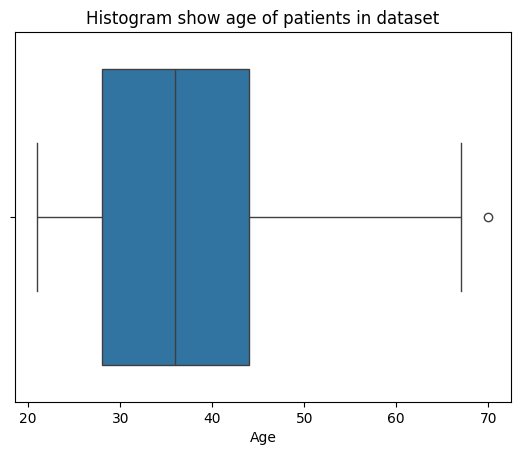

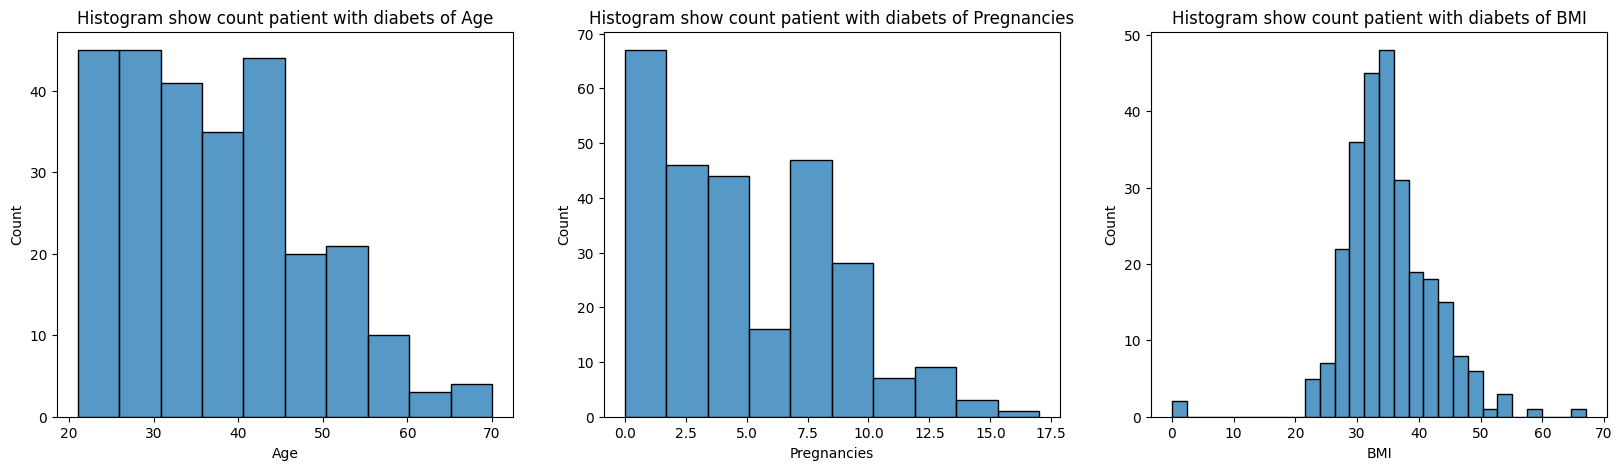

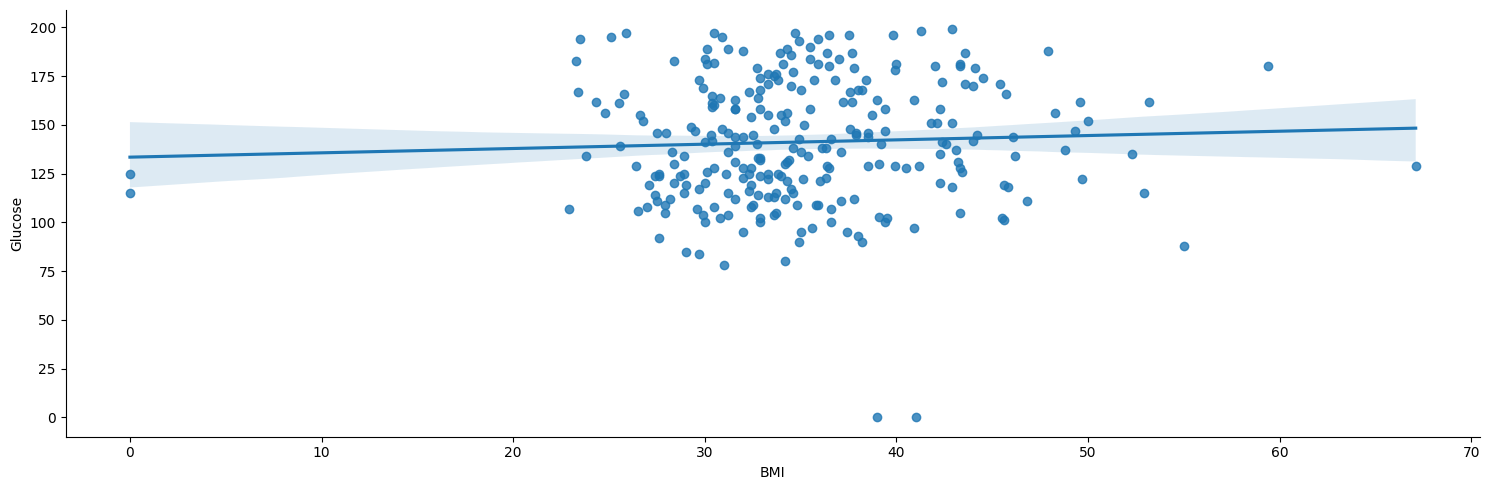

In [288]:
diabets_data_sort = diabets_data[diabets_data['Outcome'] == 1]

list_columns = ['Age', 'Pregnancies', 'BMI']

fig, ax = plt.subplots()
sns.boxplot(
        data=diabets_data_sort,
        x='Age',
        ax=ax
    );
ax.set_title(f'Histogram show age of patients in dataset')

fig, axes = plt.subplots(1, len(list_columns), figsize=(20,5))
for index, name in enumerate(list_columns):
    sns.histplot(
        data=diabets_data_sort,
        x=name,
        ax=axes[index]
    );
    axes[index].set_title(f'Histogram show count patient with diabets of {name}')

sns.lmplot(
    data=diabets_data_sort,
    x='BMI',
    y='Glucose',
    aspect=3,
    height=5
);

# Вывод:
По первому датасету можно обратить внимание, что основной возраст развития диабета среди женщин попадает в диапазон 28 - 44 лет. При этом в данном датасете особо не наблюдается развитие диабета с количеством беременности и показателем функции развития диабета. Стоит также отметить, что у пациентов с диабетом индекс массы тела варьирует в пределах 20 - 55, что соответствует избыточной массе тела. Из данного дата сета можно сделать вывод, что диабет развивается с избыточным весом.

# 2. Объединение датасета 1 и датасета 2

In [310]:
# Добавим колонку sex в датасет 1
diabets_data['Sex'] = 'F'
# Переименуем столбец Outcome в Diabets
data_columns_rename(diabets_data, {'Outcome': 'Diabetes'})


# Переименуем столбцы в датасете 2, чтоб они бились с датасет 1
# Словарь содержит список переименованных столбцов
columns_dict = {
        'sex': 'Sex', 
        'diabetes': 'Diabetes', 
        'diaBP': 'BloodPressure', 
        'glucose': 'Glucose',
        'age': 'Age'
    }
# Вызывается функция переименования столбца
data_columns_rename(test_data, columns_dict)

# Объединяем датасет 1 с датасет 2 и удаляем ненужные столбцы
# Получаем списки неповторяющихся колонок в обоих DataFrame
list_cols_drop = list(set(diabets_data.columns) ^ set(test_data.columns))

# Объединяем датасет1 и датасет2, а также удаляем неповторяющиеся колонки
df_concat = concat_and_drop(diabets_data, test_data, list_cols_drop)
df_concat

,Glucose,BloodPressure,BMI,Age,Diabetes,Sex
0,148.0,72.0,33.60,50,1,F
1,85.0,66.0,26.60,31,0,F
2,183.0,64.0,23.30,32,1,F
3,89.0,66.0,28.10,21,0,F
4,137.0,40.0,43.10,33,1,F
...,...,...,...,...,...,...
1611,77.0,77.5,27.42,46,0,F
1612,70.0,67.0,23.08,58,0,F
1613,NaN,80.0,26.41,55,0,M
1614,92.0,104.5,22.86,45,0,F
